Homogeneous Game

Saved history files to live_kmeans_game/
Round 50: Predicted colluders: []
Round 100: Predicted colluders: []


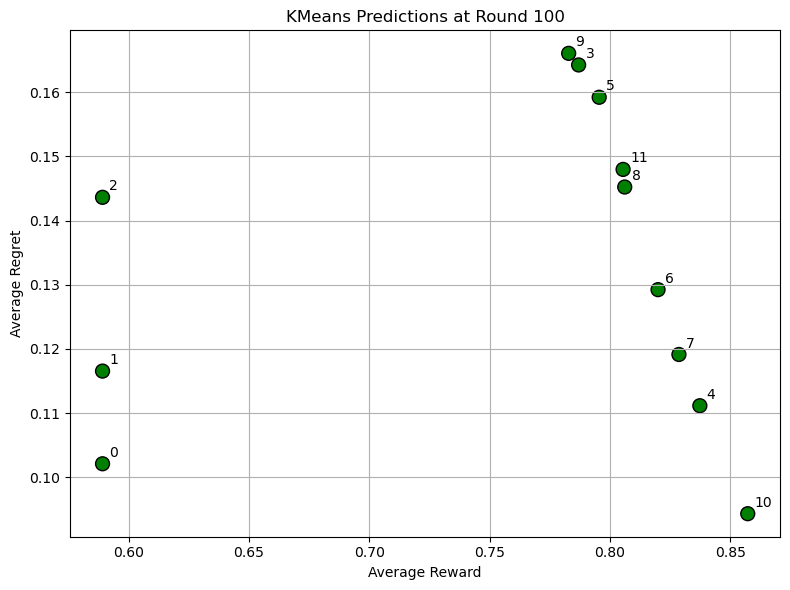

Round 150: Predicted colluders: []
Round 200: Predicted colluders: []


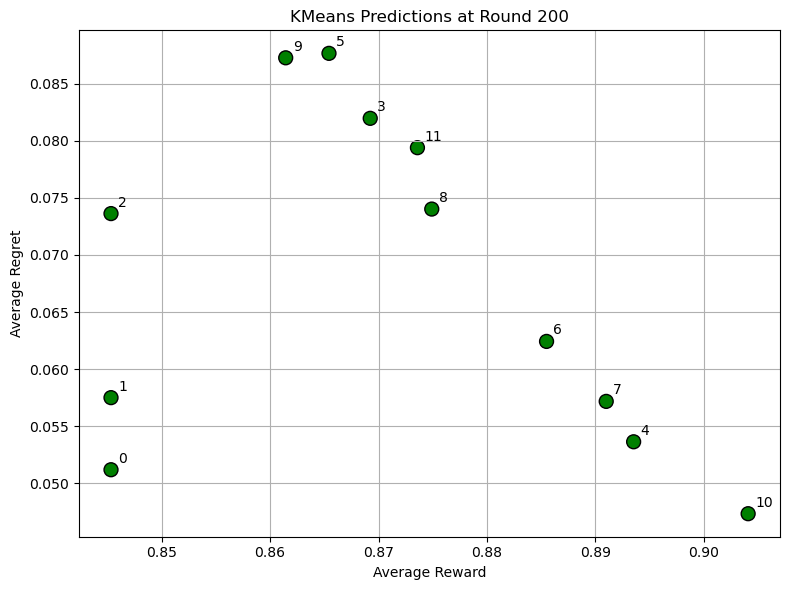

Round 250: Predicted colluders: []
Round 300: Predicted colluders: []


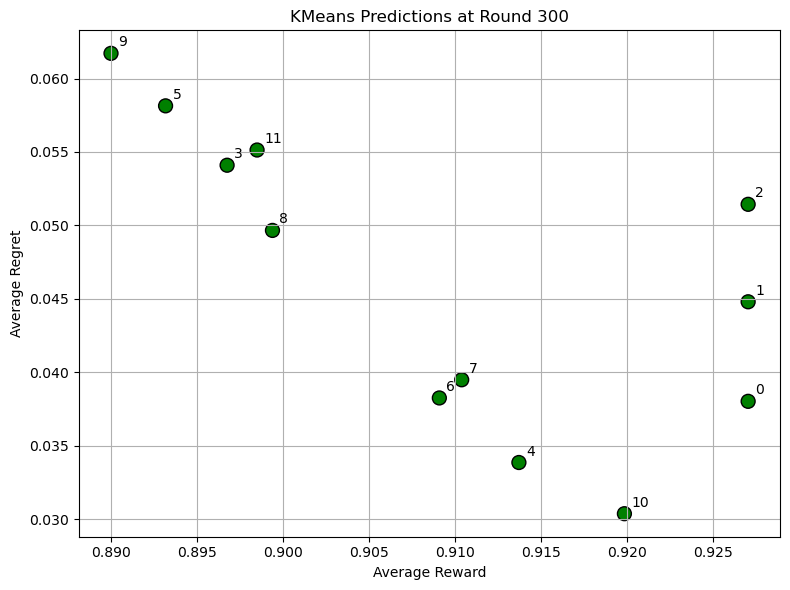

Round 350: Predicted colluders: []
Round 400: Predicted colluders: []


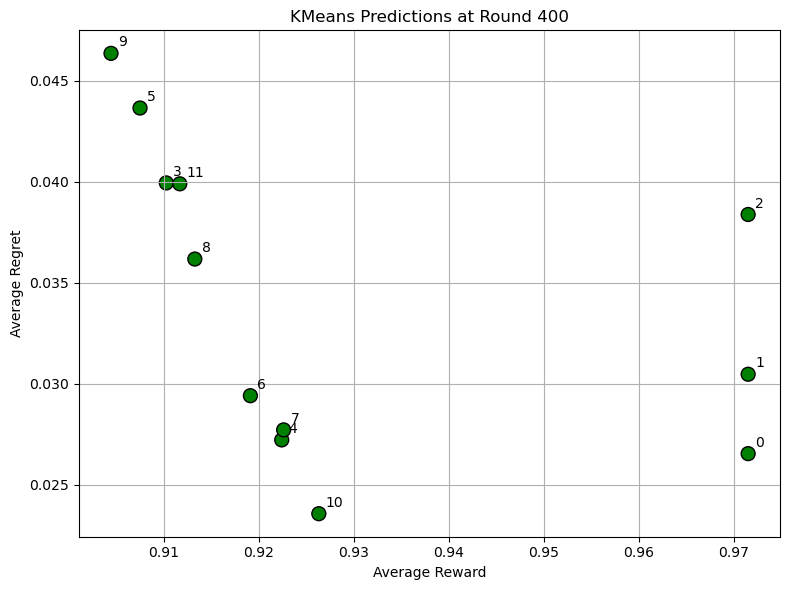

Round 450: Predicted colluders: []
Round 500: Predicted colluders: [0 1 2]


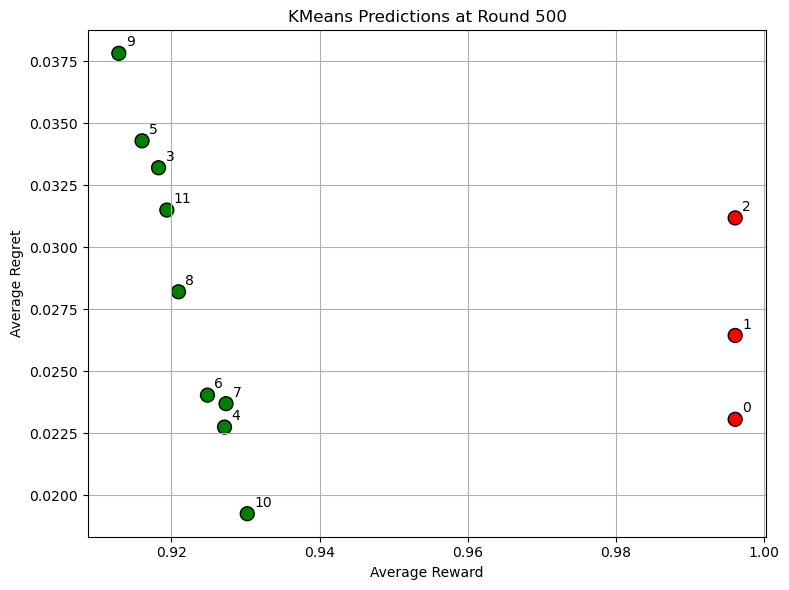

Round 550: Predicted colluders: [0 1 2]
Round 600: Predicted colluders: [0 1 2]


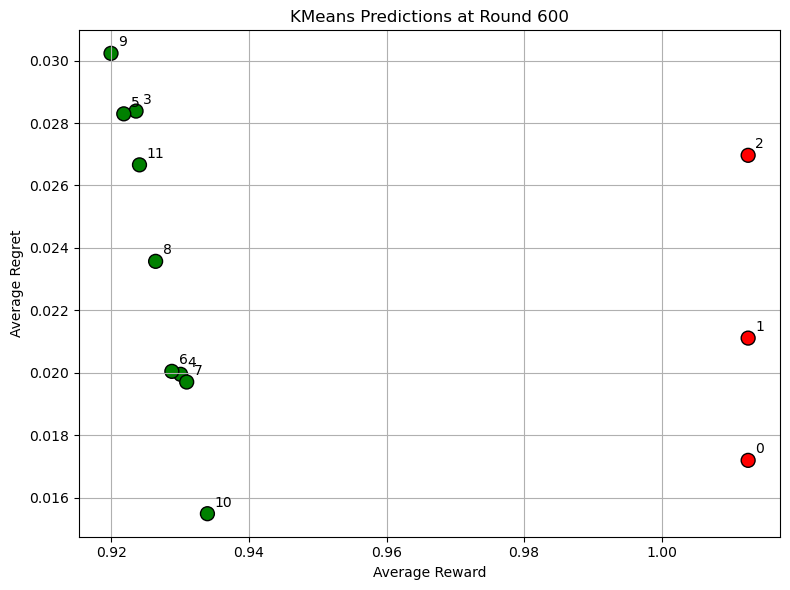

Round 650: Predicted colluders: [0 1 2]
Round 700: Predicted colluders: [0 1 2]


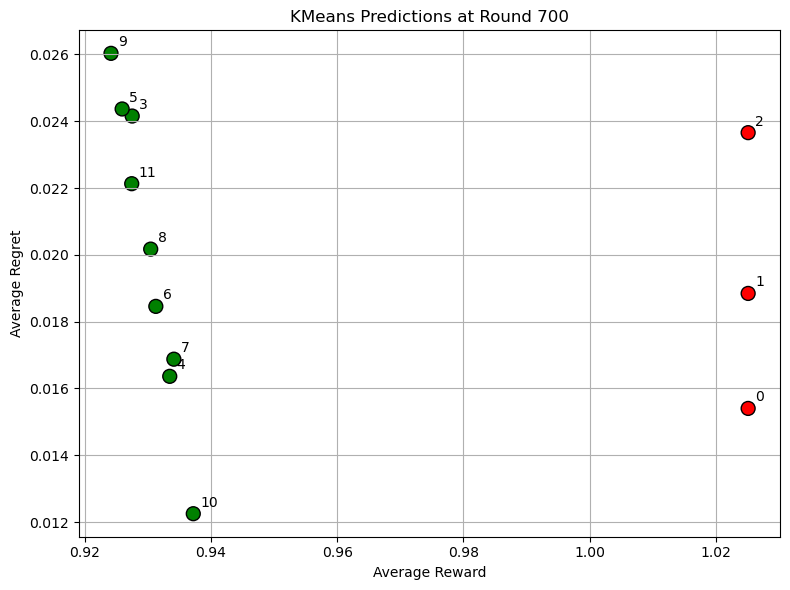

Round 750: Predicted colluders: [0 1 2]
Round 800: Predicted colluders: [0 1 2]


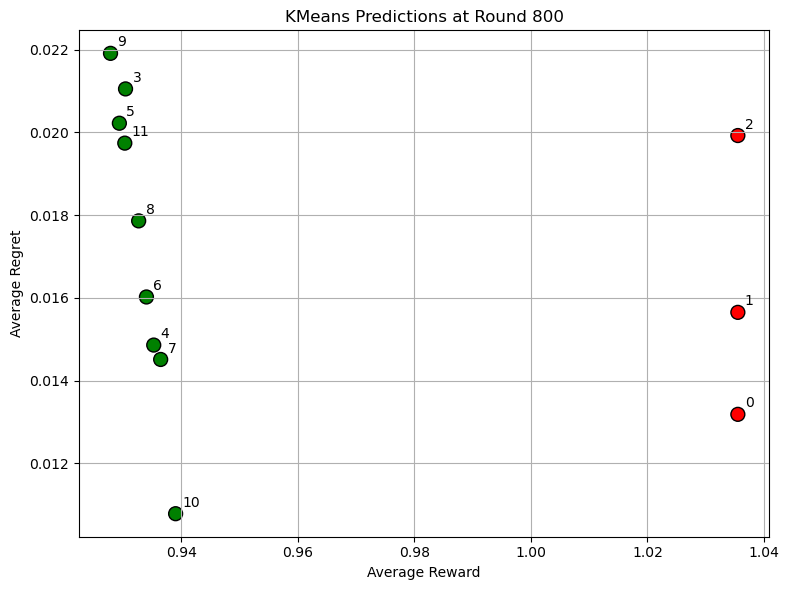

Round 850: Predicted colluders: [0 1 2]
Round 900: Predicted colluders: [0 1 2]


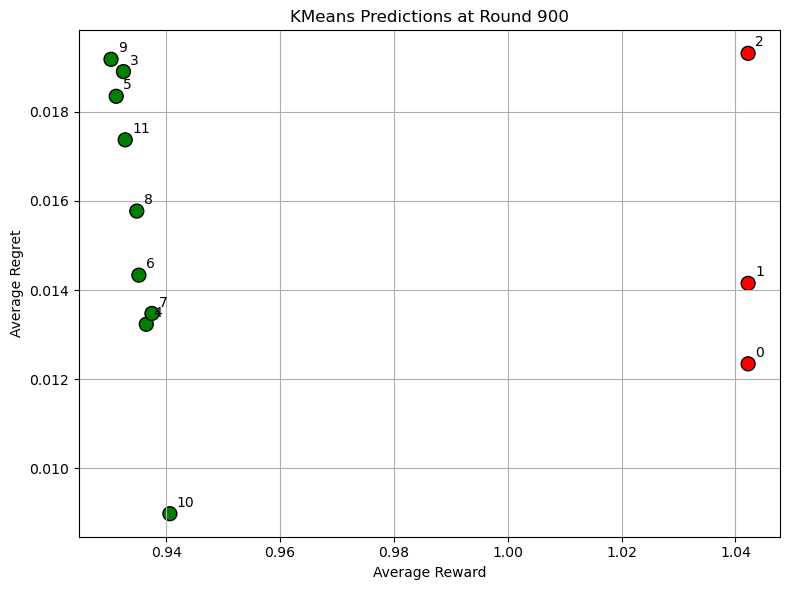

Round 950: Predicted colluders: [0 1 2]
Round 1000: Predicted colluders: [0 1 2]


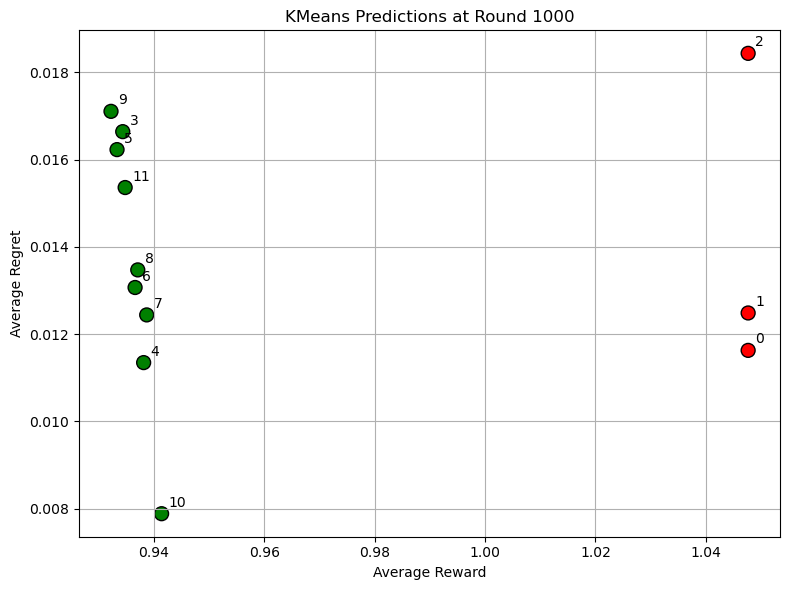

In [2]:
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from game import simulate_game

def true_labels(num_players, num_colluders):
    return np.array([1 if i < num_colluders else 0 for i in range(num_players)])

def extract_features_up_to_t(rewards, regrets, t):
    avg_rewards = rewards[:, :t+1].mean(axis=1)
    avg_regrets = regrets[:, :t+1].mean(axis=1)
    return np.vstack([avg_rewards, avg_regrets]).T

def periodic_kmeans_predictions(kmeans_model, mapping, rewards, regrets, print_step=50, plot_step=100):
    num_players, num_rounds = rewards.shape

    for t in range(print_step, num_rounds + 1, print_step):
        X_t = extract_features_up_to_t(rewards, regrets, t-1)
        cluster_labels = kmeans_model.predict(X_t)
        preds = np.array([mapping[c] for c in cluster_labels])

        print(f"Round {t}: Predicted colluders: {np.where(preds == 1)[0]}")

        # Plot every `plot_step` rounds
        if t % plot_step == 0:
            avg_rewards = X_t[:, 0]
            avg_regrets = X_t[:, 1]

            plt.figure(figsize=(8, 6))
            colors = ['red' if label == 1 else 'green' for label in preds]
            plt.scatter(avg_rewards, avg_regrets, c=colors, s=100, edgecolors='black')
            for i in range(num_players):
                plt.annotate(f"{i}", (avg_rewards[i], avg_regrets[i]), textcoords="offset points", xytext=(5, 5))
            plt.xlabel("Average Reward")
            plt.ylabel("Average Regret")
            plt.title(f"KMeans Predictions at Round {t}")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

# === Load saved model and mapping ===
kmeans = joblib.load("kmeans_model.pkl")
mapping = joblib.load("kmeans_mapping.pkl")

# === Run a new live game ===
live_dir = "live_kmeans_game"
num_players = 12
num_colluders = 3
simulate_game(save_dir=live_dir, seed=42, num_players=num_players, num_colluders=num_colluders)

# === Load game data ===
rewards = np.load(os.path.join(live_dir, 'history_rewards.npy'))
regrets = np.load(os.path.join(live_dir, 'history_regrets.npy'))
true = true_labels(num_players, num_colluders)

# === Run periodic predictions ===
periodic_kmeans_predictions(kmeans, mapping, rewards, regrets, print_step=50, plot_step=100)


Hetergeneous Game

Saved to live_kmeans_game
Round 50: Predicted colluders: [0 1 2]
Round 100: Predicted colluders: [ 0  1  2  3  4  5  6  7  9 11]


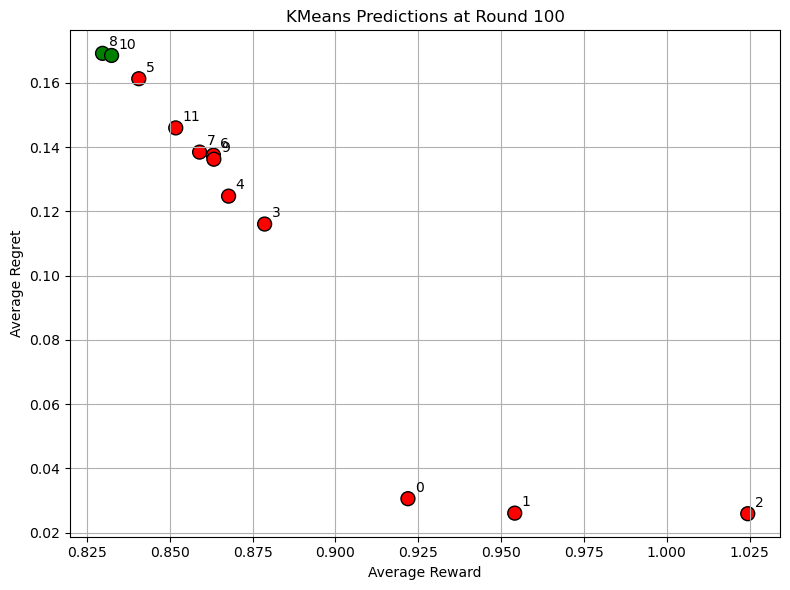

Round 150: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 200: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


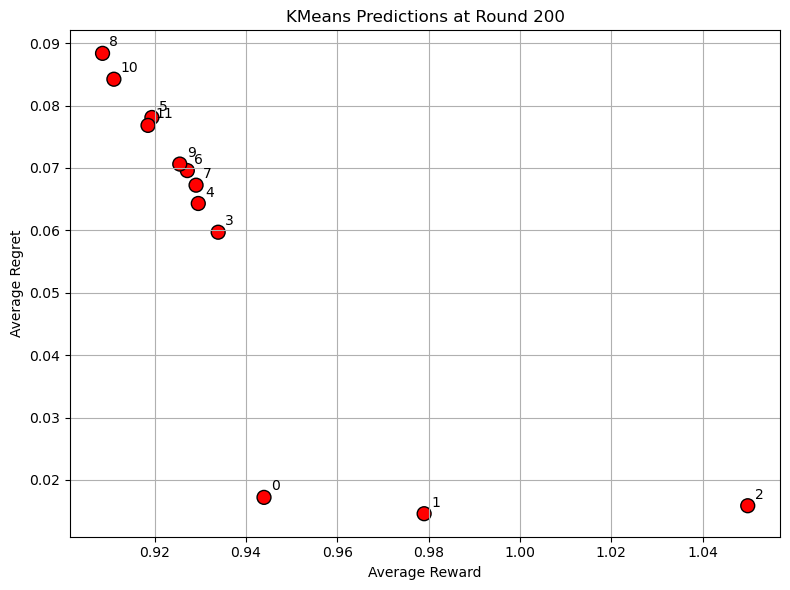

Round 250: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 300: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


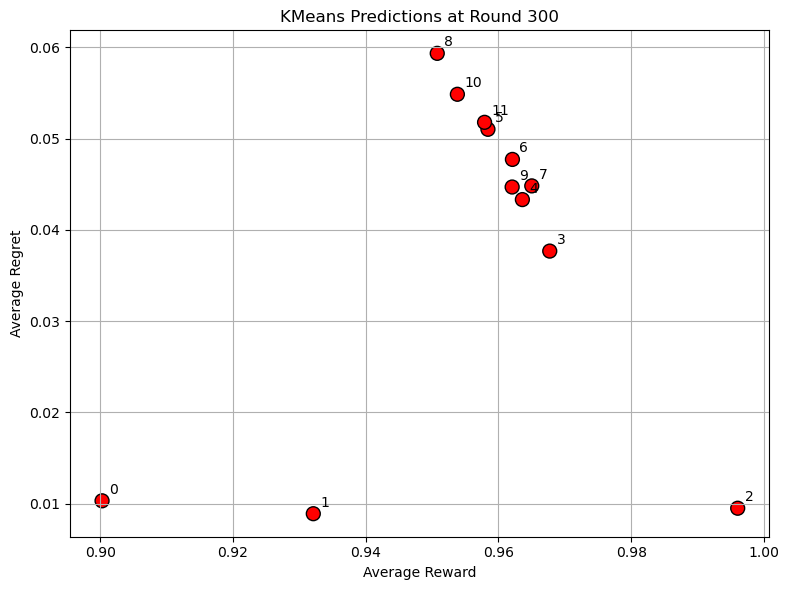

Round 350: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 400: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


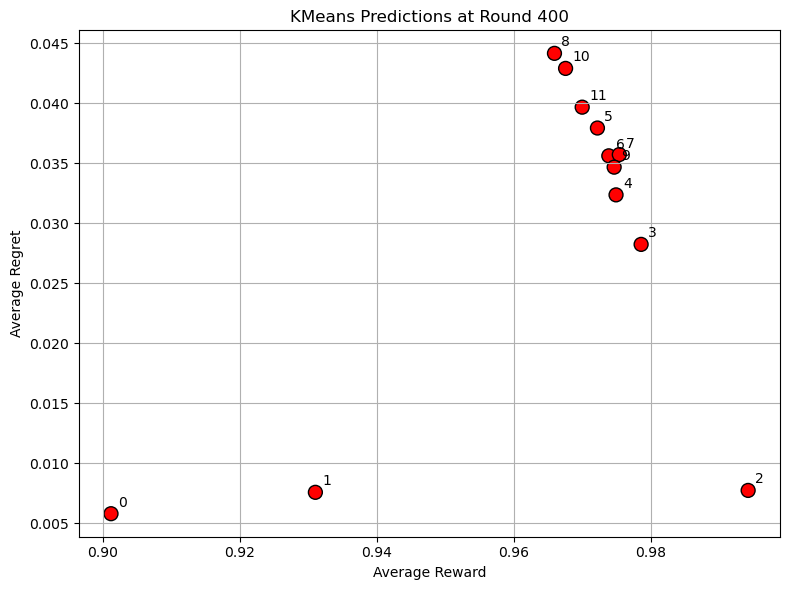

Round 450: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 500: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


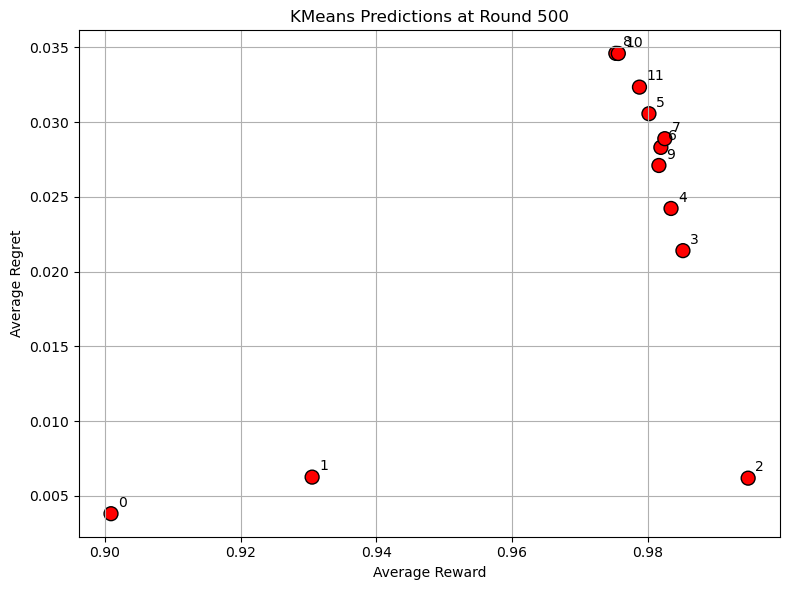

Round 550: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 600: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


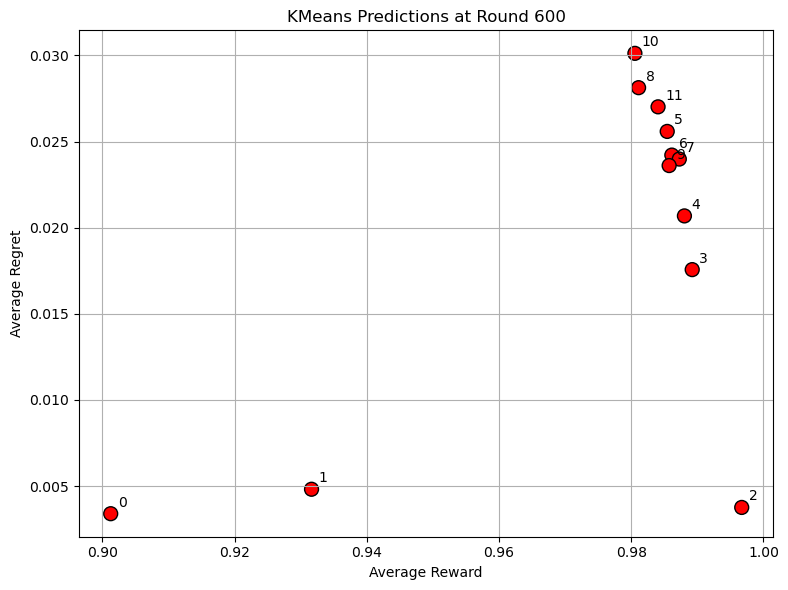

Round 650: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 700: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


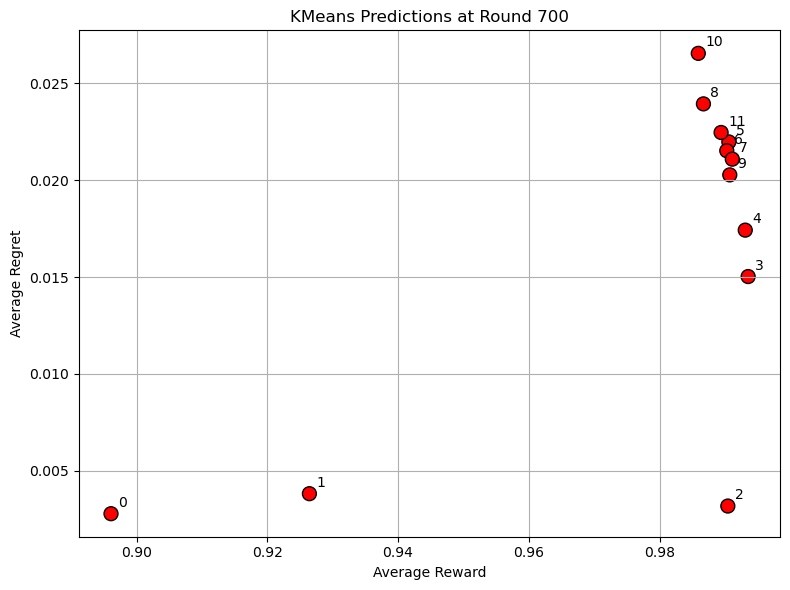

Round 750: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 800: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


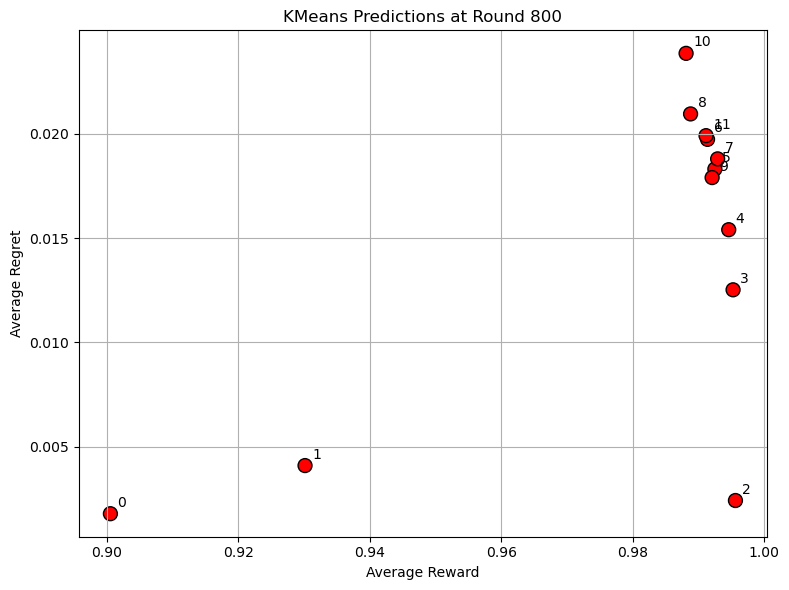

Round 850: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 900: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


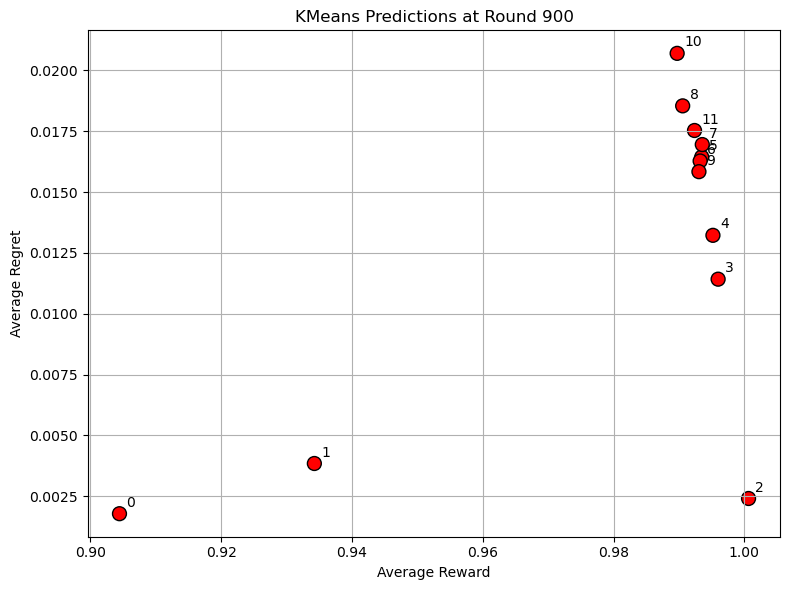

Round 950: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Round 1000: Predicted colluders: [ 0  1  2  3  4  5  6  7  8  9 10 11]


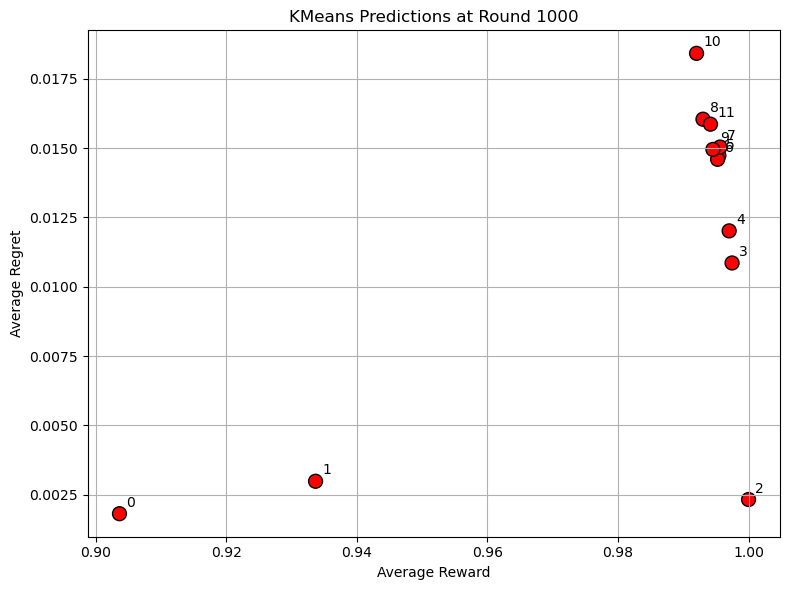

In [7]:
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from game import simulate_game
from risky_collusion_game import simulate_risky_collusion_game

def true_labels(num_players, num_colluders):
    return np.array([1 if i < num_colluders else 0 for i in range(num_players)])

def extract_features_up_to_t(rewards, regrets, t):
    avg_rewards = rewards[:, :t+1].mean(axis=1)
    avg_regrets = regrets[:, :t+1].mean(axis=1)
    return np.vstack([avg_rewards, avg_regrets]).T

def periodic_kmeans_predictions(kmeans_model, mapping, rewards, regrets, print_step=50, plot_step=100):
    num_players, num_rounds = rewards.shape

    for t in range(print_step, num_rounds + 1, print_step):
        X_t = extract_features_up_to_t(rewards, regrets, t-1)
        cluster_labels = kmeans_model.predict(X_t)
        preds = np.array([mapping[c] for c in cluster_labels])

        print(f"Round {t}: Predicted colluders: {np.where(preds == 1)[0]}")

        # Plot every `plot_step` rounds
        if t % plot_step == 0:
            avg_rewards = X_t[:, 0]
            avg_regrets = X_t[:, 1]

            plt.figure(figsize=(8, 6))
            colors = ['red' if label == 1 else 'green' for label in preds]
            plt.scatter(avg_rewards, avg_regrets, c=colors, s=100, edgecolors='black')
            for i in range(num_players):
                plt.annotate(f"{i}", (avg_rewards[i], avg_regrets[i]), textcoords="offset points", xytext=(5, 5))
            plt.xlabel("Average Reward")
            plt.ylabel("Average Regret")
            plt.title(f"KMeans Predictions at Round {t}")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

# === Load saved model and mapping ===
kmeans = joblib.load("kmeans_model.pkl")
mapping = joblib.load("kmeans_mapping.pkl")

# === Run a new live game ===
live_dir = "live_kmeans_game"
num_players = 12
num_colluders = 3
simulate_risky_collusion_game(save_dir=live_dir, num_players=num_players, num_colluders=num_colluders)

# === Load game data ===
rewards = np.load(os.path.join(live_dir, 'history_rewards.npy'))
regrets = np.load(os.path.join(live_dir, 'history_regrets.npy'))
true = true_labels(num_players, num_colluders)

# === Run periodic predictions ===
periodic_kmeans_predictions(kmeans, mapping, rewards, regrets, print_step=50, plot_step=100)
